<a href="https://colab.research.google.com/github/Gloou-ui/NM/blob/main/%D0%9F%D1%96%D0%B4%D1%81%D1%83%D0%BC%D0%BA%D0%BE%D0%B2%D0%B5_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%D0%9B%D0%B8%D1%82%D0%B2%D0%B8%D0%BD_%D0%9C%D0%B8%D1%80%D0%BE%D1%81%D0%BB%D0%B0%D0%B2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Був присутнім на парі

Виконано методом: Інтерполяційний багаточлен

In [ ]:
import numpy as np

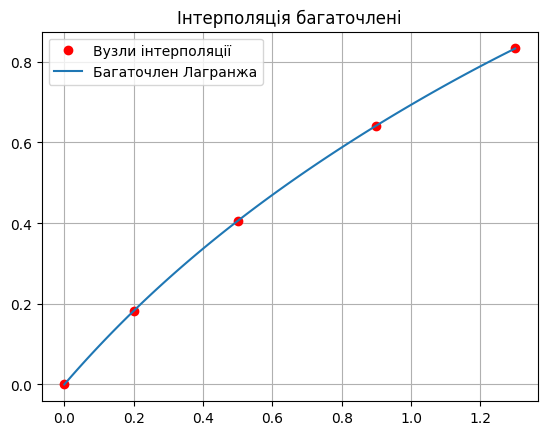

In [ ]:
import matplotlib.pyplot as plt

xi = np.array([0.0, 0.2, 0.5, 0.9, 1.3])
yi = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909])

def lagrange_interp(x, y, xx):
    yy = np.zeros_like(xx)
    n = len(x)
    for i in range(n):
        term = np.ones_like(xx)
        for j in range(n):
            if j != i:
                term *= (xx - x[j]) / (x[i] - x[j])
        yy += y[i] * term
    return yy

xx = np.linspace(min(xi), max(xi), 100)
yy = lagrange_interp(xi, yi, xx)

plt.plot(xi, yi, 'ro', label='Вузли інтерполяції')
plt.plot(xx, yy, label='Багаточлен Лагранжа')
plt.legend()
plt.title('Інтерполяція багаточлені')
plt.grid(True)
plt.show()

Виконано методом: інтерполяційний багаточлен Ньютона

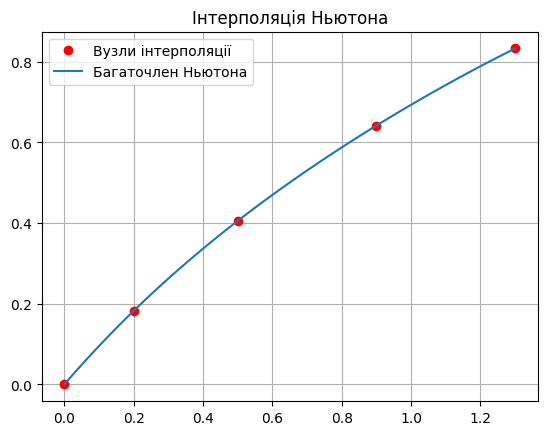

In [ ]:

import matplotlib.pyplot as plt

xi = np.array([0.0, 0.2, 0.5, 0.9, 1.3])
yi = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909])

def divided_diff(x, y):
    n = len(x)
    coef = np.copy(y)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j-1:n-1]) / (x[j:n] - x[0:n-j])
    return coef

def newton_interp(coef, x, xx):
    n = len(coef)
    yy = np.zeros_like(xx)
    for i in range(n):
        term = coef[i] * np.ones_like(xx)
        for j in range(i):
            term *= (xx - x[j])
        yy += term
    return yy

coef = divided_diff(xi, yi)
xx = np.linspace(min(xi), max(xi), 100)
yy = newton_interp(coef, xi, xx)

plt.plot(xi, yi, 'ro', label='Вузли інтерполяції')
plt.plot(xx, yy, label='Багаточлен Ньютона')
plt.legend()
plt.title('Інтерполяція Ньютона')
plt.grid(True)
plt.show()

Виконано методом: ряд Тейлора 3-го порядку

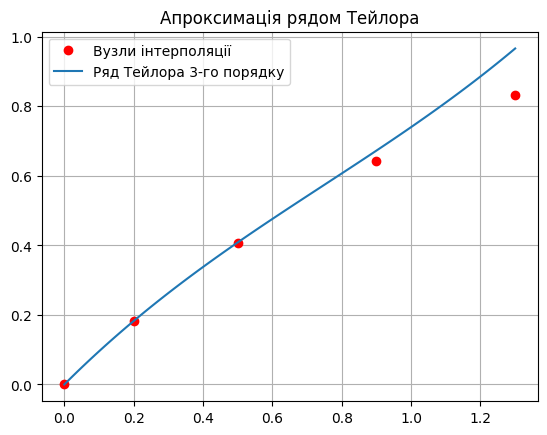

In [ ]:
import matplotlib.pyplot as plt

xi = np.array([0.0, 0.2, 0.5, 0.9, 1.3])
yi = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909])

def lagrange_interp(x, y, xx):
    yy = np.zeros_like(xx)
    n = len(x)
    for i in range(n):
        term = np.ones_like(xx)
        for j in range(n):
            if j != i:
                term *= (xx - x[j]) / (x[i] - x[j])
        yy += y[i] * term
    return yy

lagrange_fun = lambda xx: lagrange_interp(xi, yi, xx)

def numerical_derivative(fx, xx, h=1e-5, order=1):
    if order == 1:
        return (fx(xx + h) - fx(xx - h)) / (2 * h)
    elif order == 2:
        return (fx(xx + h) - 2*fx(xx) + fx(xx - h)) / (h**2)
    elif order == 3:
        h2 = 2*h
        return (fx(xx + h2) - 2*fx(xx + h) + 2*fx(xx - h) - fx(xx - h2)) / (2*h**3)
    else:
        return None

def taylor_3_approx(x0, xx):
    f0 = lagrange_fun(x0)
    f1 = numerical_derivative(lagrange_fun, x0, order=1)
    f2 = numerical_derivative(lagrange_fun, x0, order=2)
    f3 = numerical_derivative(lagrange_fun, x0, order=3)
    dx = xx - x0
    return f0 + f1*dx + (f2*dx**2)/2 + (f3*dx**3)/6

xx = np.linspace(min(xi), max(xi), 100)
yy = taylor_3_approx(0.0, xx)

plt.plot(xi, yi, 'ro', label='Вузли інтерполяції')
plt.plot(xx, yy, label='Ряд Тейлора 3-го порядку')
plt.legend()
plt.title('Апроксимація рядом Тейлора')
plt.grid(True)
plt.show()

Виконано методом: кубічний сплайн

Кубічний поліном сплайса:
Інтервал [0.0, 0.2]: S_0(x) = 0.000000 + 0.941492(x - 0.00) + 0.000000(x - 0.00)^2 + -0.747061(x - 0.00)^3
Інтервал [0.2, 0.5]: S_1(x) = 0.182322 + 0.851845(x - 0.20) + -0.448237(x - 0.20)^2 + 0.293733(x - 0.20)^3
Інтервал [0.5, 0.9]: S_2(x) = 0.405465 + 0.662211(x - 0.50) + -0.183877(x - 0.50)^2 + 0.014453(x - 0.50)^3
Інтервал [0.9, 1.3]: S_3(x) = 0.641854 + 0.522047(x - 0.90) + -0.166534(x - 0.90)^2 + 0.138778(x - 0.90)^3


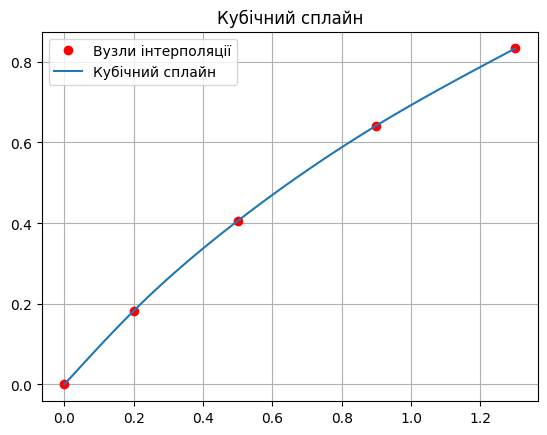

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

xi = np.array([0.0, 0.2, 0.5, 0.9, 1.3])
yi = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909])

cs = CubicSpline(xi, yi, bc_type='natural')

print("Кубічний поліном сплайса:")
n_intervals = len(xi) - 1
for i in range(n_intervals):
    a = cs.c[3, i]
    b = cs.c[2, i]
    c = cs.c[1, i]
    d = cs.c[0, i]
    print(f"Інтервал [{xi[i]}, {xi[i+1]}]: S_{i}(x) = {a:.6f} + {b:.6f}(x - {xi[i]:.2f}) + {c:.6f}(x - {xi[i]:.2f})^2 + {d:.6f}(x - {xi[i]:.2f})^3")

xx = np.linspace(min(xi), max(xi), 100)
yy = cs(xx)

plt.plot(xi, yi, 'ro', label='Вузли інтерполяції')
plt.plot(xx, yy, label='Кубічний сплайн')
plt.legend()
plt.title('Кубічний сплайн')
plt.grid(True)
plt.show()